In [1]:
!pip install -r requirements.txt

In [2]:
Phillippines_Data = '1WmIn1GGsZKv9w96fug6fQAQH9GJwkatYMZRoBgB1GqY'

In [3]:
import pandas as pd
import numpy as np
from eep153_tools.sheets import read_sheets

x = read_sheets(Phillippines_Data,sheet='Expenditures')
x.columns.name = 'j'
                 
# Change 'Uganda' to key of your own sheet in Sheets, above
d = read_sheets(Phillippines_Data,sheet="HH Characteristics")
d.columns.name = 'k'

# x may have duplicate columns
x = x.groupby('j',axis=1).sum()
x = x.replace(0,np.nan) # Replace zeros with missing

# Take logs of expenditures; call this y
y = np.log(x.set_index(['i','t','m']))

d.set_index(['i','t','m'],inplace=True)

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


In [4]:
from cfe.estimation import drop_columns_wo_covariance

y = drop_columns_wo_covariance(y,min_obs=30)

Missing dependencies for OracleDemands.


In [5]:
use = y.index.intersection(d.index)
y = y.loc[use,:]
d = d.loc[use,:]
y = y.stack()

d = d.stack()

# Check that indices are in right places!
assert y.index.names == ['i','t','m','j']
assert d.index.names == ['i','t','m','k']

In [6]:
from cfe import Regression

result = Regression(y=y,d=d)

In [7]:
result.predicted_expenditures()

i      t       m         j               
2.0    2003.0  Bukidnon  Alcoholic drinks    16.949761
                         Ampalaya             7.916604
                         Atsal               11.123974
                         Bagoong              6.953420
                         Banana              24.842649
                                               ...    
941.0  2003.0  Bukidnon  Sweet potato         9.489847
                         Talong              14.718917
                         Tomatoes            11.544402
                         Vetsin, MSG          7.270038
                         Vinegar              3.755012
Length: 23898, dtype: float64

<IPython.core.display.Javascript object>


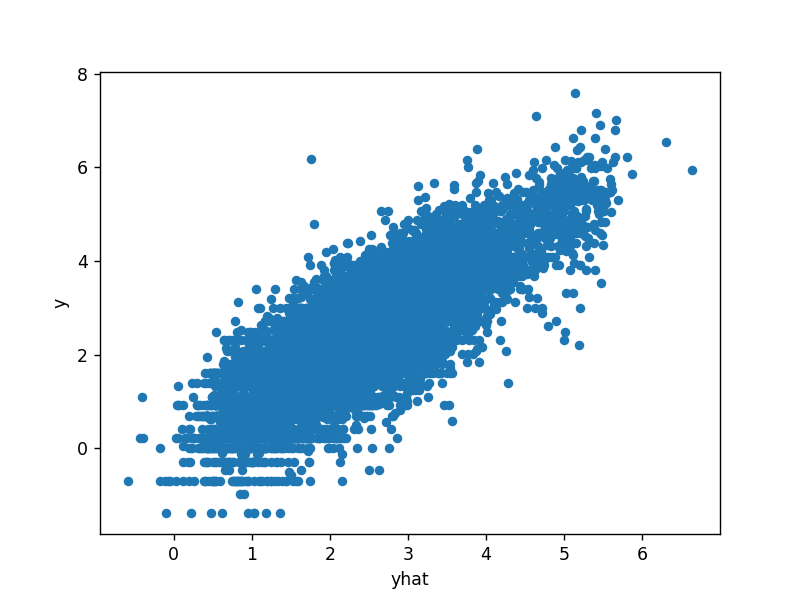

<AxesSubplot:xlabel='yhat', ylabel='y'>

In [8]:
%matplotlib notebook
df = pd.DataFrame({'y':y,'yhat':result.get_predicted_log_expenditures()})
df.plot.scatter(x = 'yhat', y = 'y')

# (Relative) Income Elasticity



Some of the parameters have an interesting interpretation.  First among these are the $\beta$ coefficients, which govern how *income elastic* different goods are (higher values means more elastic).  These are also called *Frisch elasticities*.

In [9]:
result.get_beta().sort_values()

j
Rice                                             0.180364
Potato                                           0.216686
Vinegar                                          0.240674
Sweet potato                                     0.244773
Bagoong                                          0.251586
Salt                                             0.256453
Sugar                                            0.258890
Vetsin, MSG                                      0.300273
Dried fish and smoked fish                       0.301952
Alcoholic drinks                                 0.338546
Corn products                                    0.352442
Rice products                                    0.356575
Other beverages                                  0.359096
Soybean and other products                       0.367449
Food made from flour                             0.378492
Carrots                                          0.379145
Mongo and other products                         0.387117
Coffee      

<IPython.core.display.Javascript object>


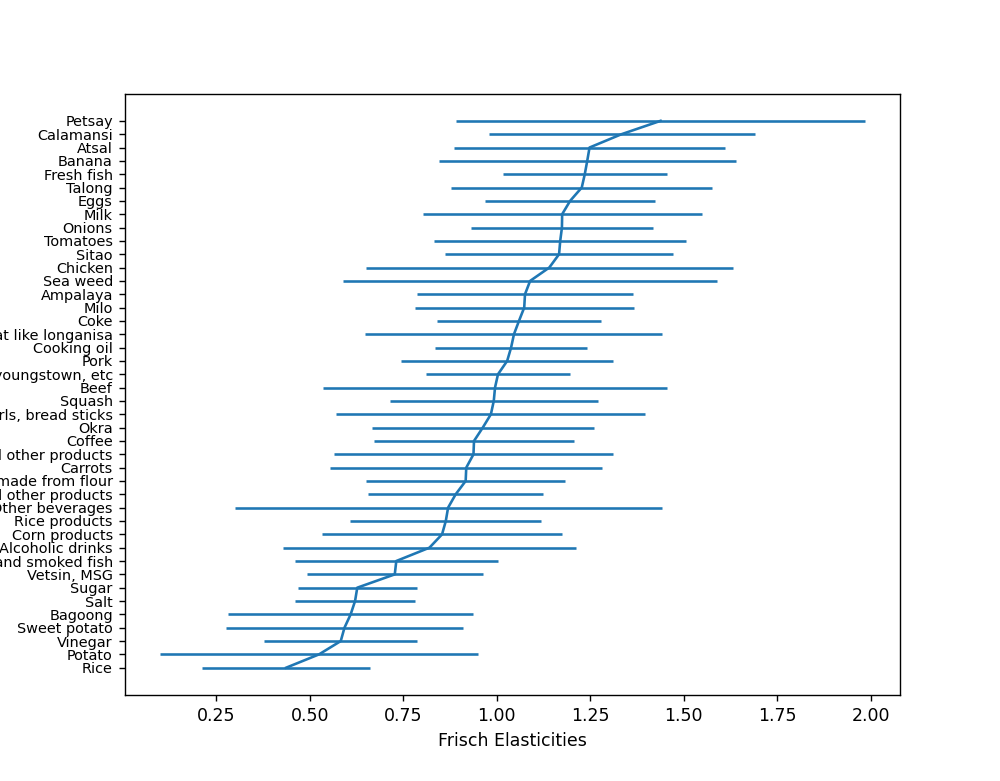

<IPython.core.display.Javascript object>


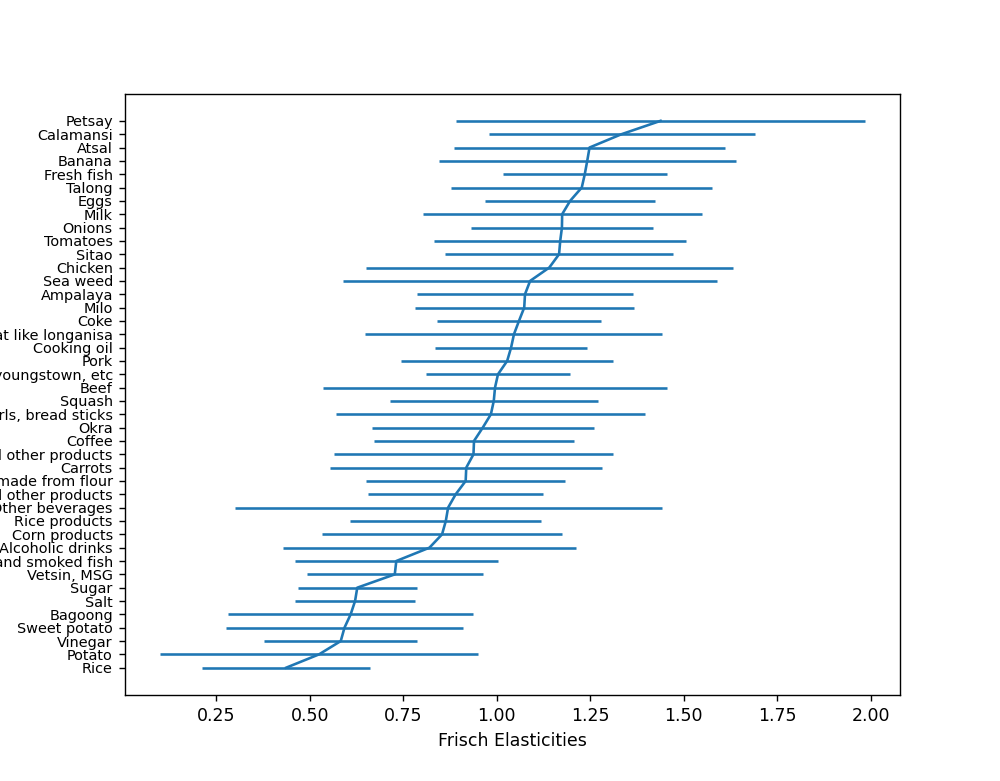

In [10]:
result.graph_beta()

# Demand and Household Composition

We&rsquo;re particularly interested in the effects of household composition on demand.  These are captured by the $\gamma_j$ parameters in the regression.

In [11]:
result.gamma

k,Males 0-1,Males 1-5,Males 5-10,Males 10-15,Males 15-20,Males 20-30,Males 30-50,Males 50-60,Males 60-100,Females 0-1,Females 1-5,Females 5-10,Females 10-15,Females 15-20,Females 20-30,Females 30-50,Females 50-60,Females 60-100,log HSize,Constant
j,,,,,,,,,,,,,,,,,,,,
Alcoholic drinks,0.167578,-0.009092,-0.050066,-0.194632,0.106636,0.217972,0.248910,-0.234048,-0.277192,-0.271023,-0.001309,-0.102215,0.094512,-0.075919,0.013904,0.003682,-0.010416,0.118566,-0.058963,-0.191506
Ampalaya,0.033300,0.368817,0.259375,0.255039,0.185829,0.239060,0.161268,0.089504,0.075035,-0.186582,0.148055,0.305813,0.187932,0.180529,0.129002,0.172812,0.174537,0.120056,-1.005324,0.367397
Atsal,0.076178,0.214911,0.312343,0.019122,0.112940,0.157415,0.094940,0.218926,0.032624,0.366526,-0.085272,0.338872,0.030293,-0.003056,0.142564,0.149496,0.054664,0.005785,-0.593274,0.123868
Bagoong,-0.084261,0.101493,0.091014,0.011673,0.064971,0.054927,0.057399,0.152972,0.144023,-0.289767,-0.024785,0.152063,0.048299,0.060973,-0.106980,0.016824,0.019041,-0.163483,0.295438,-0.740481
Banana,0.271568,0.218437,0.288330,0.240457,-0.064088,0.125584,-0.023391,0.084512,0.380285,-0.009375,0.069938,0.292862,0.044838,0.102656,0.052768,0.270173,0.261661,0.184777,-0.731487,0.303375
Beef,0.194938,0.039360,0.031371,0.114968,-0.066483,0.087062,0.147404,0.342633,0.009060,0.063315,0.006427,-0.003283,-0.022346,0.057225,0.007649,0.088129,-0.129808,-0.088884,-0.185411,-0.266420
Calamansi,-0.189225,-0.004375,0.139907,0.174533,0.132186,0.029016,-0.018518,-0.514148,0.009091,0.311062,0.135570,0.078610,0.226412,-0.079396,0.135957,0.190920,0.413739,0.102225,-0.300935,-0.110578
Carrots,0.145905,0.273372,-0.135994,-0.097526,-0.022060,-0.154796,-0.050761,-0.245145,0.111818,0.081189,-0.019716,-0.227082,-0.009596,0.181873,0.111162,0.362758,0.418212,-0.053574,-0.021670,-0.471097
Chicken,0.101307,0.080266,0.180819,-0.019252,0.007080,0.026569,0.017642,0.127111,-0.135140,-0.152778,-0.268606,0.161533,0.010589,0.021047,0.145233,-0.054448,-0.008045,0.156234,0.476183,-1.240715


In [12]:
import cfe
result.to_pickle('phillippines_estimates.pickle')
result = cfe.regression.read_pickle('phillippines_estimates.pickle')

# Nutritional Content of Different Foods

In [30]:
# ID of sheet and name of worksheet for google sheets.   
# Easiest if these are public (or use service accounts; share with students@eep153.iam.gserviceaccount.com)
import pandas as pd
import numpy as np
from eep153_tools.sheets import read_sheets

relevant_foods = read_sheets(Phillippines_Data,sheet='FCT')
y = read_sheets(Phillippines_Data,sheet = 'Code Match ')
y.rename(columns ={'Code ' :'fct'}, inplace = True)
relevant_foods = relevant_foods.merge(y, how = 'inner', on = 'fct').drop(columns = ['Member', 'Food ', 'bouisfg', 'foodgrp'], axis = 1)


Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


# Nutritional adequacy of diet 

### Dietary Requirement

In [21]:
InputFiles = {'Expenditures':('1WmIn1GGsZKv9w96fug6fQAQH9GJwkatYMZRoBgB1GqY','Expenditures'),
              'HH Characteristics':('1WmIn1GGsZKv9w96fug6fQAQH9GJwkatYMZRoBgB1GqY','HH Characteristics'),
              'FCT':('1WmIn1GGsZKv9w96fug6fQAQH9GJwkatYMZRoBgB1GqY','FCT'),
              'Quantities':('1WmIn1GGsZKv9w96fug6fQAQH9GJwkatYMZRoBgB1GqY','Quantities'),
             'Prices Per Household':('1WmIn1GGsZKv9w96fug6fQAQH9GJwkatYMZRoBgB1GqY','Prices Per Household')}
InputFiles

{'Expenditures': ('1WmIn1GGsZKv9w96fug6fQAQH9GJwkatYMZRoBgB1GqY',
  'Expenditures'),
 'HH Characteristics': ('1WmIn1GGsZKv9w96fug6fQAQH9GJwkatYMZRoBgB1GqY',
  'HH Characteristics'),
 'FCT': ('1WmIn1GGsZKv9w96fug6fQAQH9GJwkatYMZRoBgB1GqY', 'FCT'),
 'Quantities': ('1WmIn1GGsZKv9w96fug6fQAQH9GJwkatYMZRoBgB1GqY', 'Quantities'),
 'Prices Per Household': ('1WmIn1GGsZKv9w96fug6fQAQH9GJwkatYMZRoBgB1GqY',
  'Prices Per Household')}

In [42]:
from eep153_tools.sheets import read_sheets
import numpy as np
import pandas as pd

def get_clean_sheet(key,sheet=None):

    df = read_sheets(key,sheet=sheet)
    df.columns = [c.strip() for c in df.columns.tolist()]

    df = df.loc[:,~df.columns.duplicated(keep='first')]   

    df = df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

    df = df.loc[~df.index.duplicated(), :]

    return df

# Get expenditures...
x = get_clean_sheet(InputFiles['Expenditures'][0],
                    sheet=InputFiles['Expenditures'][1])

if 'm' not in x.columns:
    x['m'] = 1

x = x.set_index(['i','t','m'])
x.columns.name = 'j'

x = x.apply(lambda x: pd.to_numeric(x,errors='coerce'))
x = x.replace(0,np.nan)

# Get HH characteristics...
z = get_clean_sheet(InputFiles['HH Characteristics'][0],
                    sheet=InputFiles['HH Characteristics'][1])

if 'm' not in z.columns:
    z['m'] = 1

z = z.set_index(['i','t','m'])
z.columns.name = 'k'

z = z.apply(lambda x: pd.to_numeric(x,errors='coerce'))

# Get prices
# Get prices
p = get_clean_sheet(InputFiles['Prices Per Household'][0],
                    sheet=InputFiles['Prices Per Household'][1])

if 'm' not in p.columns:  # Supply "market" indicator if missing
    p['m'] = 1

p = p.set_index(['t','i', 'm'])
p.columns.name = 'j'

p = p.apply(lambda x: pd.to_numeric(x,errors='coerce'))
p = p.replace(0,np.nan)

for i in p.columns:
    p[i] = p[i].median()

fct = get_clean_sheet(InputFiles['FCT'][0],
                    sheet=InputFiles['FCT'][1])

#### This bit peculiar to Niger FCT #####
#fct = fct.loc[fct.Code.str.len()==6]
#fct = fct.set_index('Code')
#fct.columns = [v.replace('\n',' ') for v in fct.columns]
########################################
y = read_sheets(Phillippines_Data,sheet = 'Code Match ')
y.rename(columns ={'Code ' :'fct'}, inplace = True)
fct = fct.merge(y, how = 'inner', on = 'fct').drop(columns = ['Member', 'Food ', 'bouisfg', 'foodgrp'], axis = 1)
print (fct)
fct = fct.set_index('name')
fct.columns.name = 'n'

fct = fct.apply(lambda x: pd.to_numeric(x,errors='coerce'))

################## RDI, if available (consider using US) #####################
#rdi = get_clean_sheet(InputFiles['RDI'][0],
#                    sheet=InputFiles['RDI'][1])
#rdi = rdi.set_index('n')
#rdi.columns.name = 'k'

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.
     fct                name  calorie  protein  fat  carbo  fiber  ash  \
0      4  Rice milled, white    367.0      7.4  0.5   80.4    0.4  0.6   
1     22        Corn, yellow    167.0      4.4  1.5   35.4    1.1  0.8   
2     28  Corn, white, grits    368.0      8.7  2.2   76.7    2.3  0.5   
3     47    Guava, red flesh     92.0      0.9  0.4   23.8    4.8  0.6   
4     67              Durian    147.0      2.0  1.2   36.1    1.9  0.8   
..   ...                 ...      ...      ...  ...    ...    ...  ...   
70  1318     Coconut vinegar      3.0      0.0  0.1    1.4    NaN  0.3   
71  1320                 Tea    357.0     21.7  1.0   65.3   11.2  4.6   
72  1324                Milo    396.0      6.5  4.5   84.9    0.4  2.2   
73  1325          Softdrinks     39.0      0.0  0.0   10.0    0.0  NaN   
74  1330                Beer     42.0      0.3  0.0    3.8    NaN  0

Here, use data on log *expenditures* and household characteristics to
create a CFEDemand `result`.

In [43]:
import cfe

result = cfe.Regression(y=np.log(x.stack()),d=z)

result.get_beta().sort_values(ascending=False) # Check sanity...

j
Petsay                                           1.414160
Calamansi                                        1.339474
Banana                                           1.258774
Fresh fish                                       1.230214
Atsal                                            1.222281
Talong                                           1.221671
Eggs                                             1.210041
Onions                                           1.181240
Milk                                             1.171247
Sitao                                            1.165865
Tomatoes                                         1.135643
Chicken                                          1.122036
Sea weed                                         1.101497
Ampalaya                                         1.080146
Processed meat like longanisa                    1.067363
Coke                                             1.055831
Cooking oil                                      1.040216
Milo        

In [55]:
import cfe

result = cfe.read_pickle('phillippines_estimates.pickle')  # Get persistent result saved above...

xhat = result.predicted_expenditures()

# Expenditures divided by prices/kg gives quantities in kgs...
qhat = (xhat.unstack('j')/p).dropna(how='all')

# Drop missing columns
qhat = qhat.loc[:,qhat.count()>0]
print(qhat)

j                      Alcoholic drinks    Ampalaya       Atsal     Bagoong  \
i     t      m                                                                
2.0   2003.0 Bukidnon        473.180840  395.830179  278.099355  222.509440   
4.0   2003.0 Bukidnon        991.800496  656.195636  324.804423  407.432236   
5.0   2003.0 Bukidnon        688.450957  285.017605   93.059910  158.085644   
6.0   2003.0 Bukidnon       2365.295631  954.840504  403.470122  529.826927   
12.0  2003.0 Bukidnon       3505.347238  531.313517  224.832463  339.778920   
...                                 ...         ...         ...         ...   
937.0 2003.0 Bukidnon        890.917279  579.457873  179.021956  228.819407   
938.0 2003.0 Bukidnon        827.718531  525.090080  191.357742  272.846122   
939.0 2003.0 Bukidnon        196.890318   74.247395   28.532178   89.773915   
940.0 2003.0 Bukidnon       1104.995658  627.566764  259.219390  306.645175   
941.0 2003.0 Bukidnon       1008.246009  812.924398 

In [57]:
use = fct.index.intersection(qhat.columns)

nutrients = qhat[use]@fct.loc[use,:]
nutrients.mean()/52    # NB: Nutrients are for past /week/ for entire household. (Depends on dataset)

n
fct         6357.240649
calorie     2104.398715
protein       37.320608
fat           14.243584
carbo        506.240153
fiber         10.921707
ash           20.129930
calcium     1202.553759
phos        1253.899675
iron          15.768746
retinol       39.362129
carotene    1801.409969
thiamine       1.283988
riboflav       1.331766
niacin        18.733248
ascorbic     433.723371
edpor       1730.311445
blufct              NaN
                    NaN
dtype: float64

Our data on demand and nutrients is at the *household* level; we
   can&rsquo;t directly compare household level nutrition with individual
   level requirements.  What we **can** do is add up minimum individual
   requirements, and see whether household total exceed these.  This
   isn&rsquo;t a guarantee that all individuals have adequate nutrition
   (since the way food is allocated in the household might be quite
   unequal, or unrelated to individual requirements), but it is
   *necessary* if all individuals are to have adequate nutrition.

For each household, we know the numbers of people in different age-sex categories.  We can match these up with data from an RDI (Recommended Dietary Intakes), then sum over different types.



In [52]:

z = z[rdi.columns.tolist()]

hh_rdi = z@rdi.T

# Uganda data is per week, so make this a recommended WEEKLY intake:
hh_rwi = hh_rdi*7

NameError: name 'rdi' is not defined

In [58]:
# Match up nutrient names
use = nutrients.columns.intersection(hh_rwi.columns)

nutrient_ratio = (nutrients[use]/hh_rwi[use]).dropna()

nutrient_ratio

NameError: name 'hh_rwi' is not defined

In [59]:
%matplotlib notebook
nutrient_ratio['Energy'].hist(bins=30)

NameError: name 'nutrient_ratio' is not defined